In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import csv
import pandas as pd
import simplekml
import math
from scipy.signal import find_peaks
import scienceplots
from glob import glob
import os

plt.style.use(['science', 'ieee', 'notebook'])

# Calculate induced drag

In [2]:
#Make velocity km/h
V = np.linspace(15,50,96) #km/h, velocity
#Induced drag D_i formula W - weight, rho - air density, b - wing span, epsilon - Oswald eff. fact.
W=450 # kg
rho=1.225 # kg/m3
b=9.55 # m
epsilon = 0.80 #   

# kg s^2
# ----------
# m 

D_i = W**2/(1/2*rho*(V*1000/3600)**2*np.pi*b**2*epsilon)

# Calculate parasite drag

In [3]:
#CD0 - zero lift drag coef., S - wing area
Cd0 = 0.022
S = 12.62 # m^2
D_p = Cd0 * 1/2 * rho * (V*1000/3600)**2 * S

# Calculate Thrust available
<div>
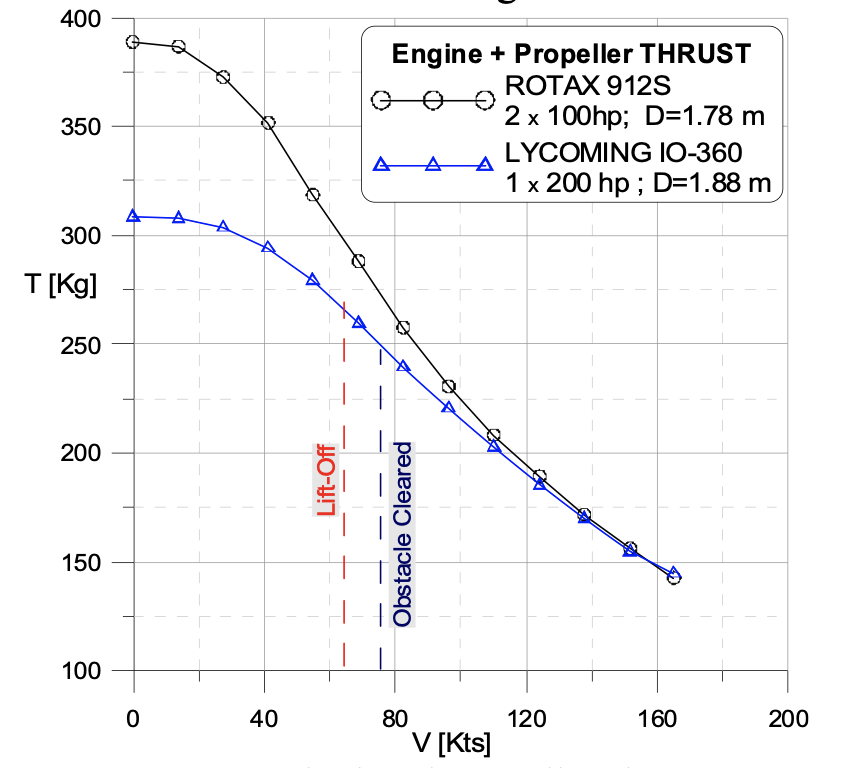
</div>

In [4]:
#V = 1, 15, 30, 40, 55, 70, 80, 95, 125
#T = 390, 385, 375, 350, 320, 290, 260, 230, 185
# linear equation
T_A = -2.61*V + 217.88

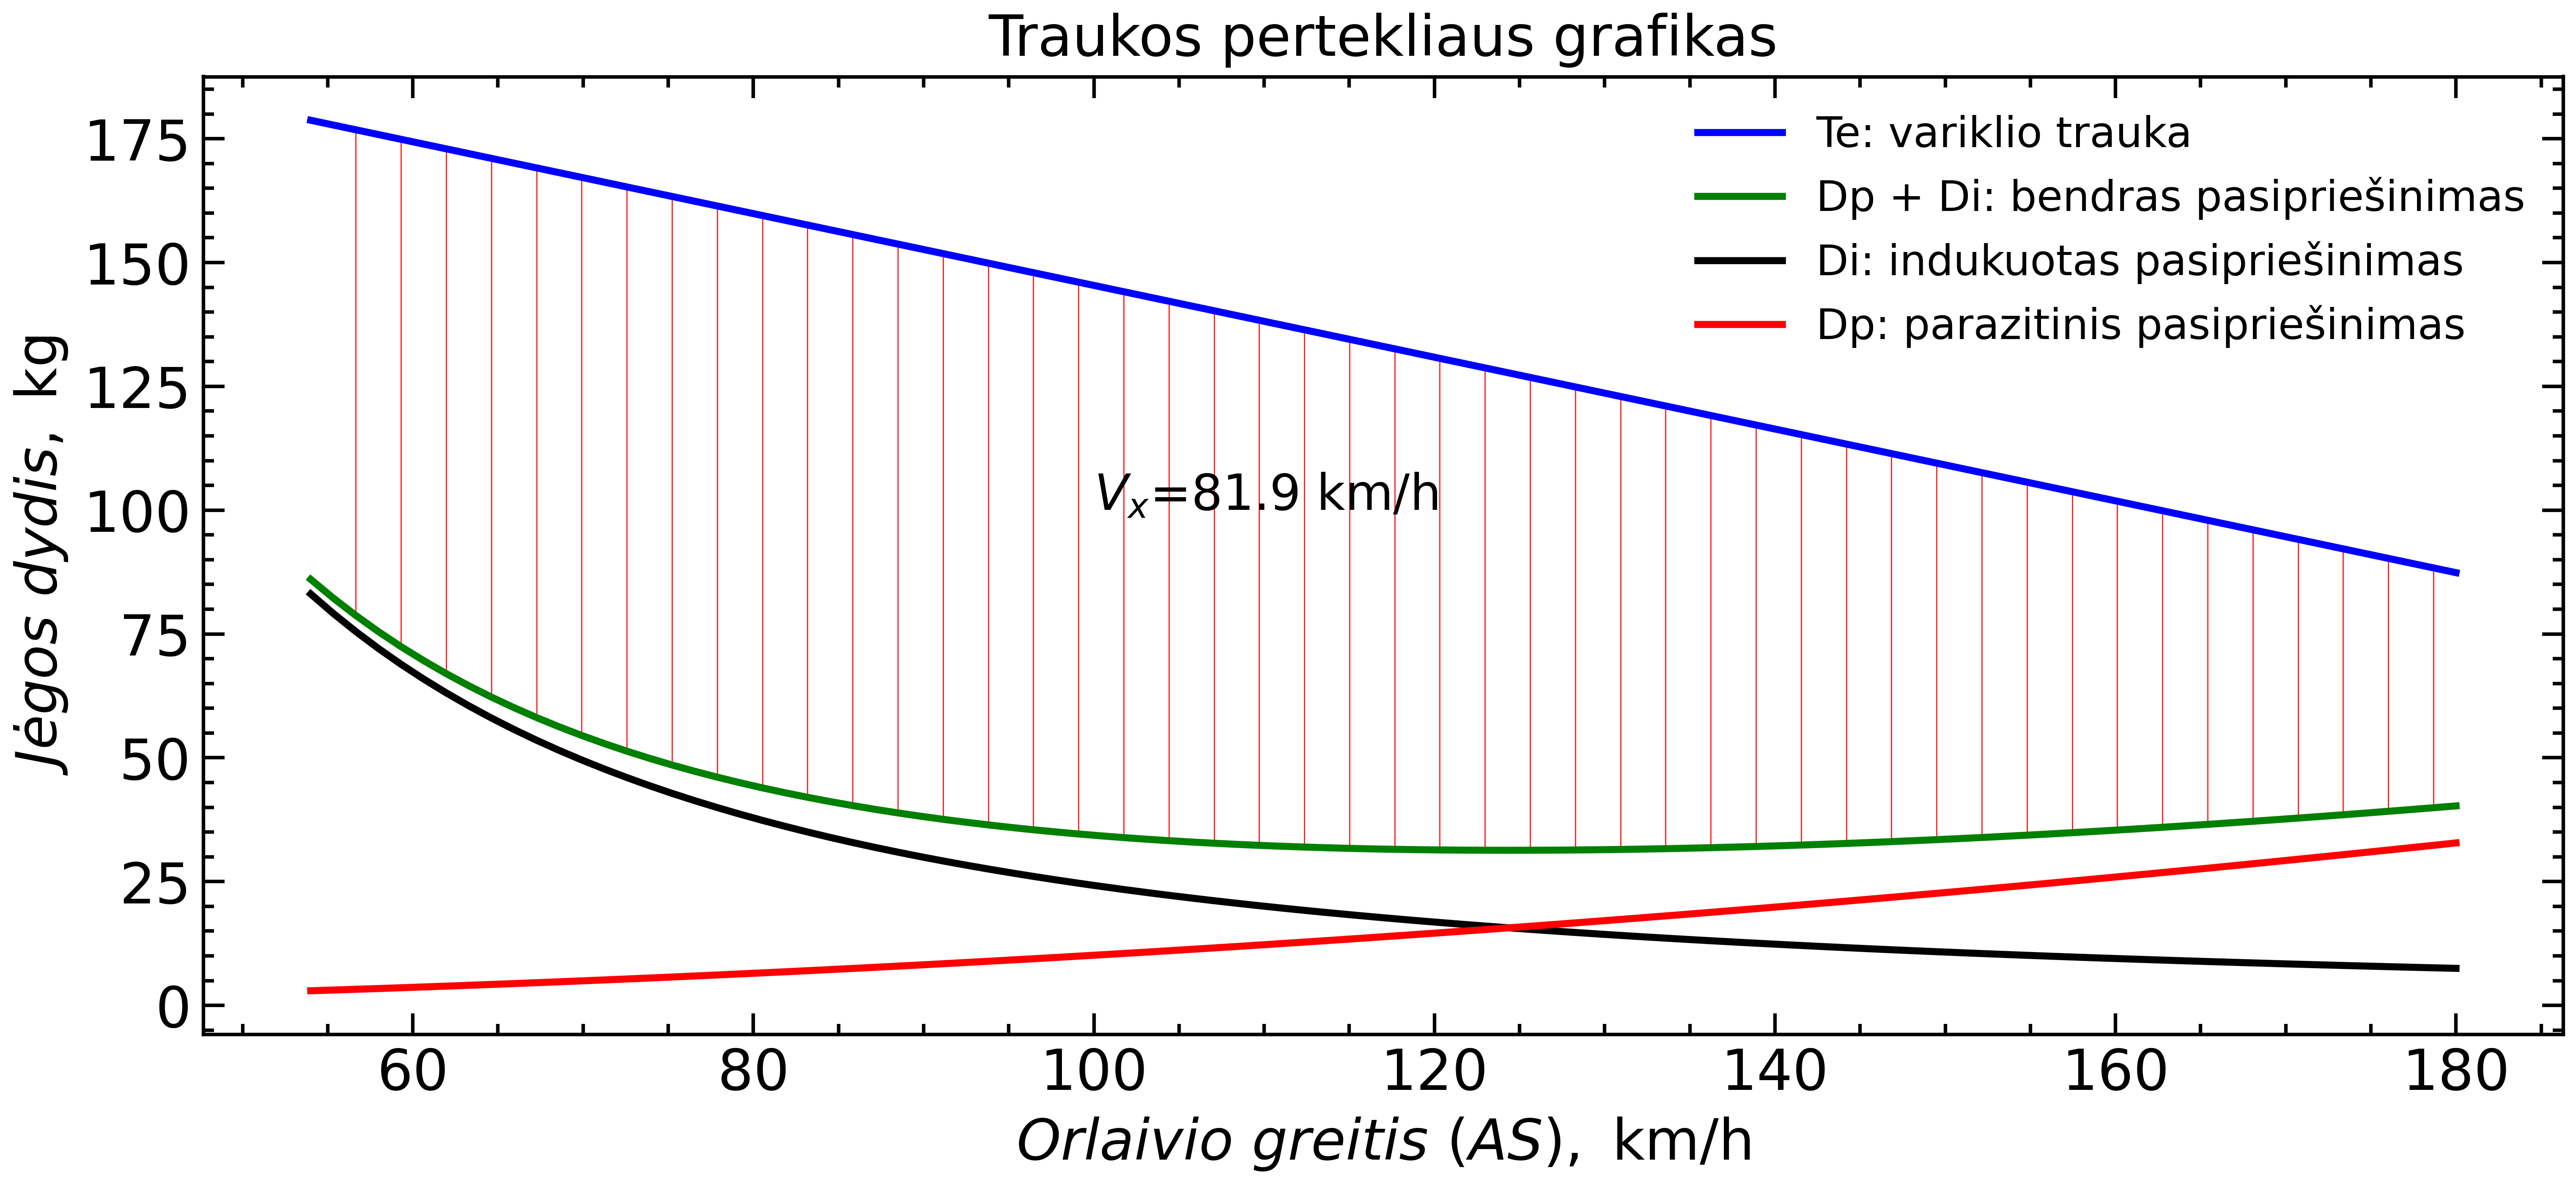

In [5]:
with plt.style.context(['science', 'ieee', 'notebook']):
    plt.figure(figsize=(12,5))
    plt.title('Traukos pertekliaus grafikas', fontsize=16)
    plt.xlabel('$Orlaivio~greitis~(AS),$ km/h')
    plt.ylabel('$Jėgos~dydis,$ kg')
    # move label#     
    xcoords = V*(3600/1000)
    ycoords = T_A-(D_i+D_p)
    i=0
    for p in range(0, 94):
        i+=2
        if i>(len(V)-2):
            break
        plt.vlines(x=V[i]*(3600/1000), ymin=(D_i[i]+D_p[i]), ymax=T_A[i], color='red', linewidth=0.3)
        
    plt.plot(V*(3600/1000),T_A, color='blue',linestyle='solid', label='Te: variklio trauka')
    plt.plot(V*(3600/1000),D_i+D_p, color='green', label='Dp + Di: bendras pasipriešinimas')
    plt.plot(V*(3600/1000),D_i, color='black', linestyle='solid', label='Di: indukuotas pasipriešinimas')
    plt.plot(V*(3600/1000),D_p, linestyle='solid', label = 'Dp: parazitinis pasipriešinimas')
    plt.text(100, 100, '$V_x$='+str(round(V[np.argmax(T_A-(D_i+D_p))]*(3600/1000),1))+' km/h', fontsize=14)
    plt.legend(loc="upper right", fontsize="12")
    plt.savefig('Dp_Di_sum_Te_delta_Vx'+'.png', dpi=300, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

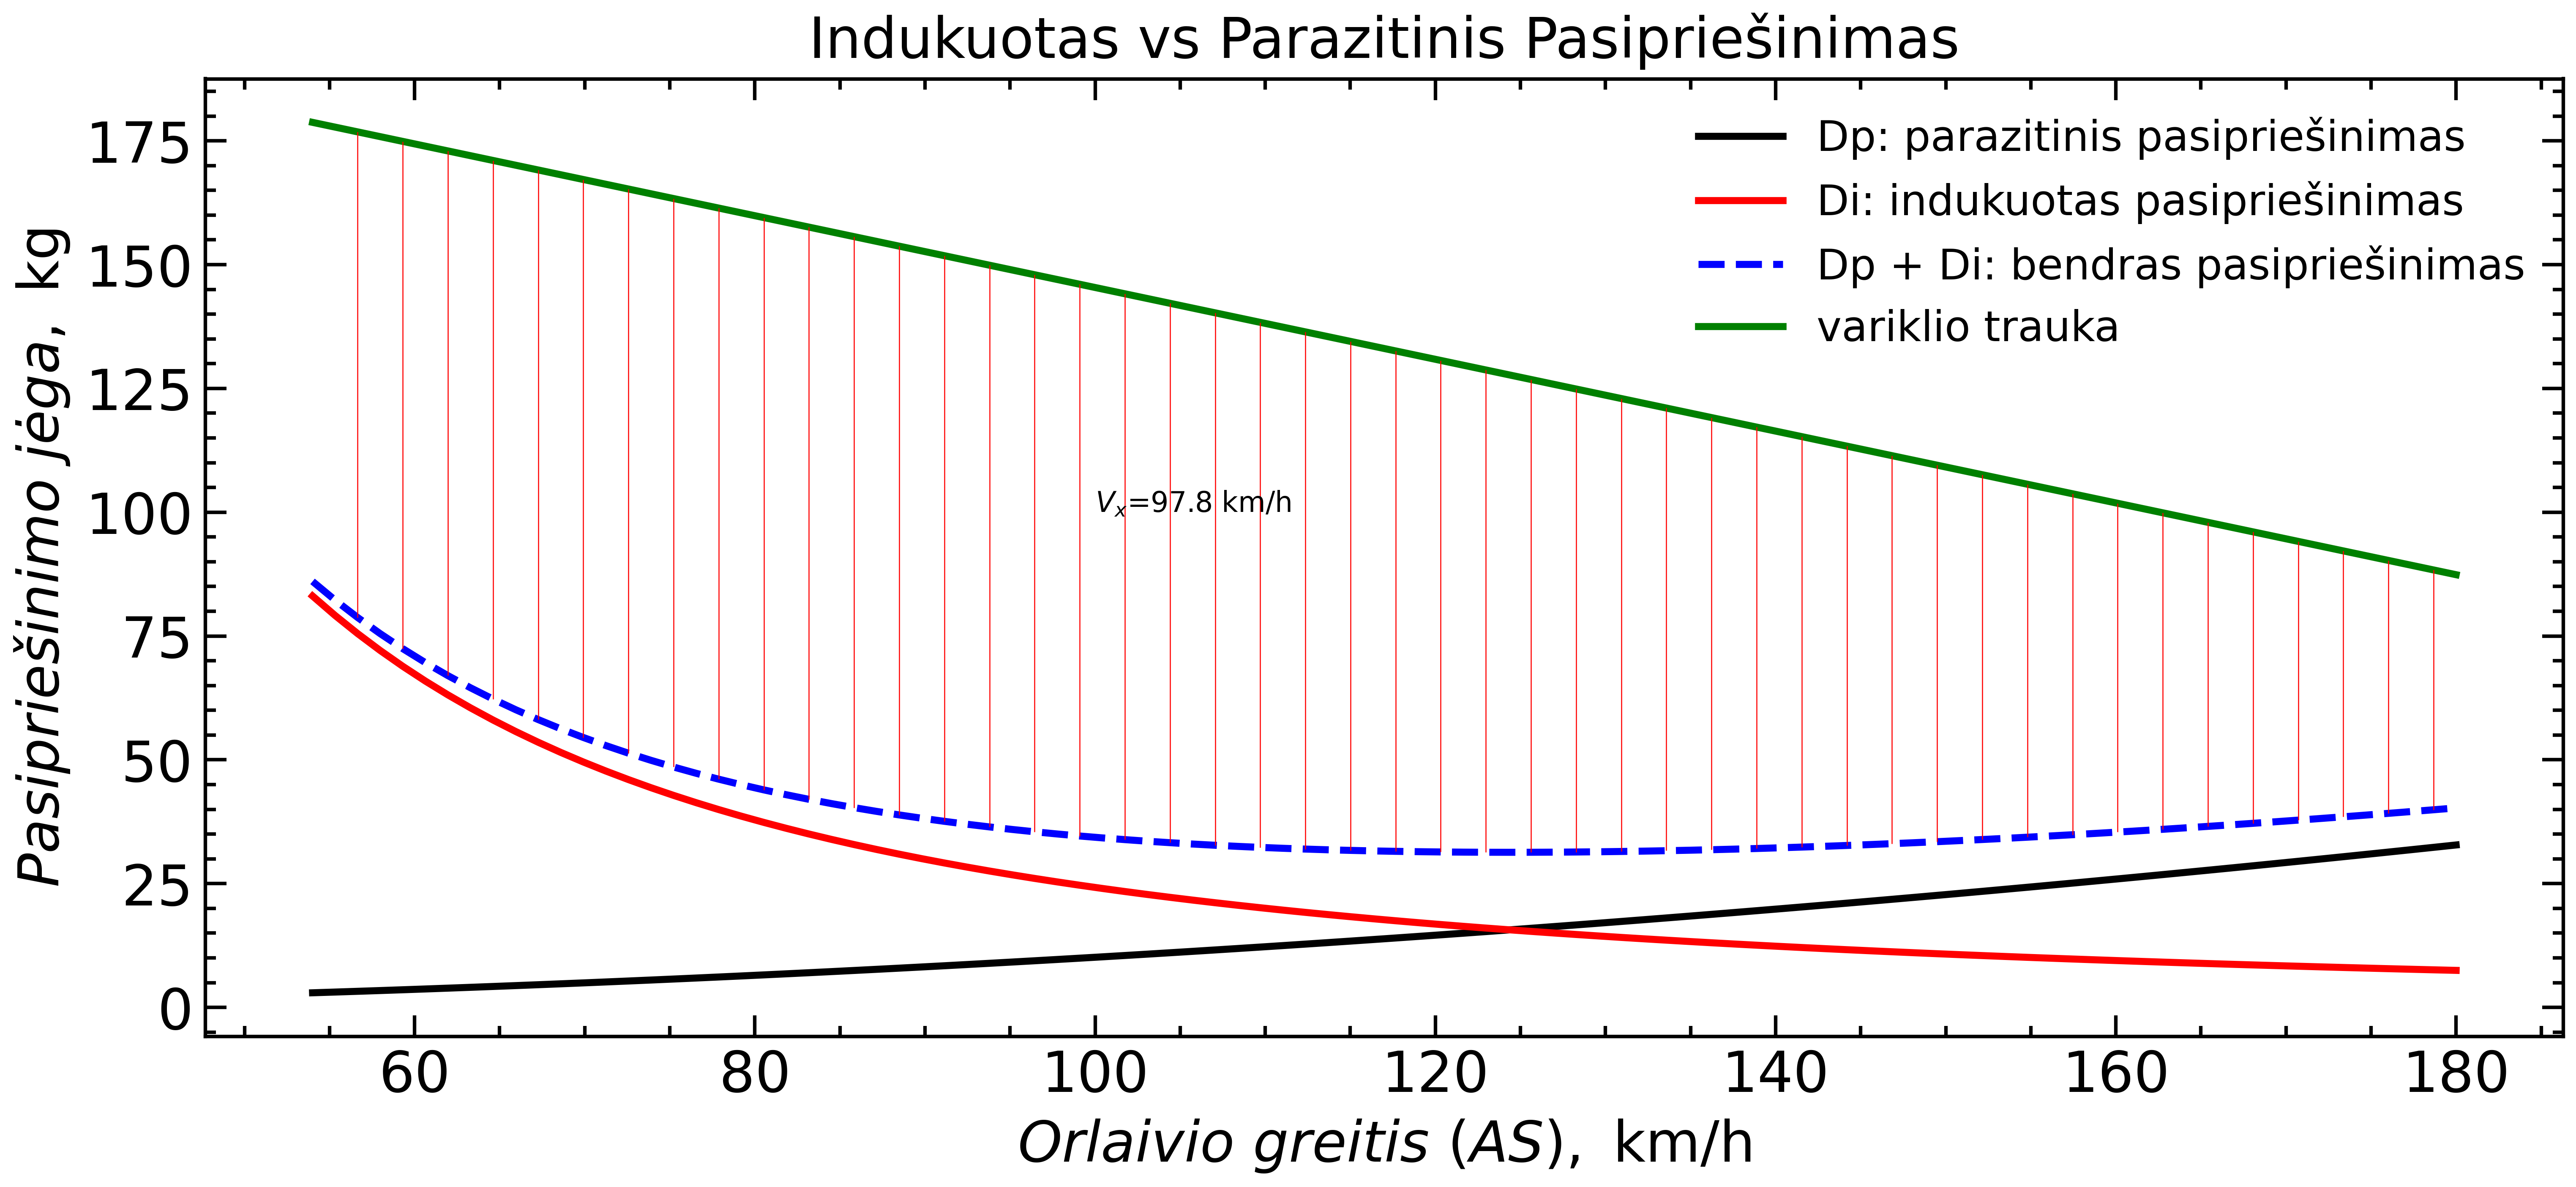

In [6]:
with plt.style.context(['science', 'ieee', 'notebook']):
    plt.figure(figsize=(12,5))
    plt.title('Indukuotas vs Parazitinis Pasipriešinimas', fontsize=16)
    plt.xlabel('$Orlaivio~greitis~(AS),$ km/h')
    plt.ylabel('$Pasipriešinimo~jėga,$ kg')
    plt.plot(V*(3600/1000),D_p, linestyle='solid', label = 'Dp: parazitinis pasipriešinimas')
    plt.plot(V*(3600/1000),D_i, color='r', linestyle='solid', label='Di: indukuotas pasipriešinimas')
    plt.plot(V*(3600/1000),D_i+D_p, color='b', label='Dp + Di: bendras pasipriešinimas')
    plt.plot(V*(3600/1000),T_A, color='g',linestyle='solid', label='variklio trauka')
    xcoords = V*(3600/1000)
    ycoords = T_A-(D_i+D_p)
    i=0
    for p in range(0, 94):
        i+=2
        if i>(len(V)-2):
            break
        plt.vlines(x=V[i]*(3600/1000), ymin=(D_i[i]+D_p[i]), ymax=T_A[i], color='red', linewidth=0.3)
        plt.legend(loc="upper right", fontsize="12")
    plt.text(100, 100, '$V_x$='+str(round(V[np.argmax(T_A-D_i+D_p)]*(3600/1000),1))+' km/h')

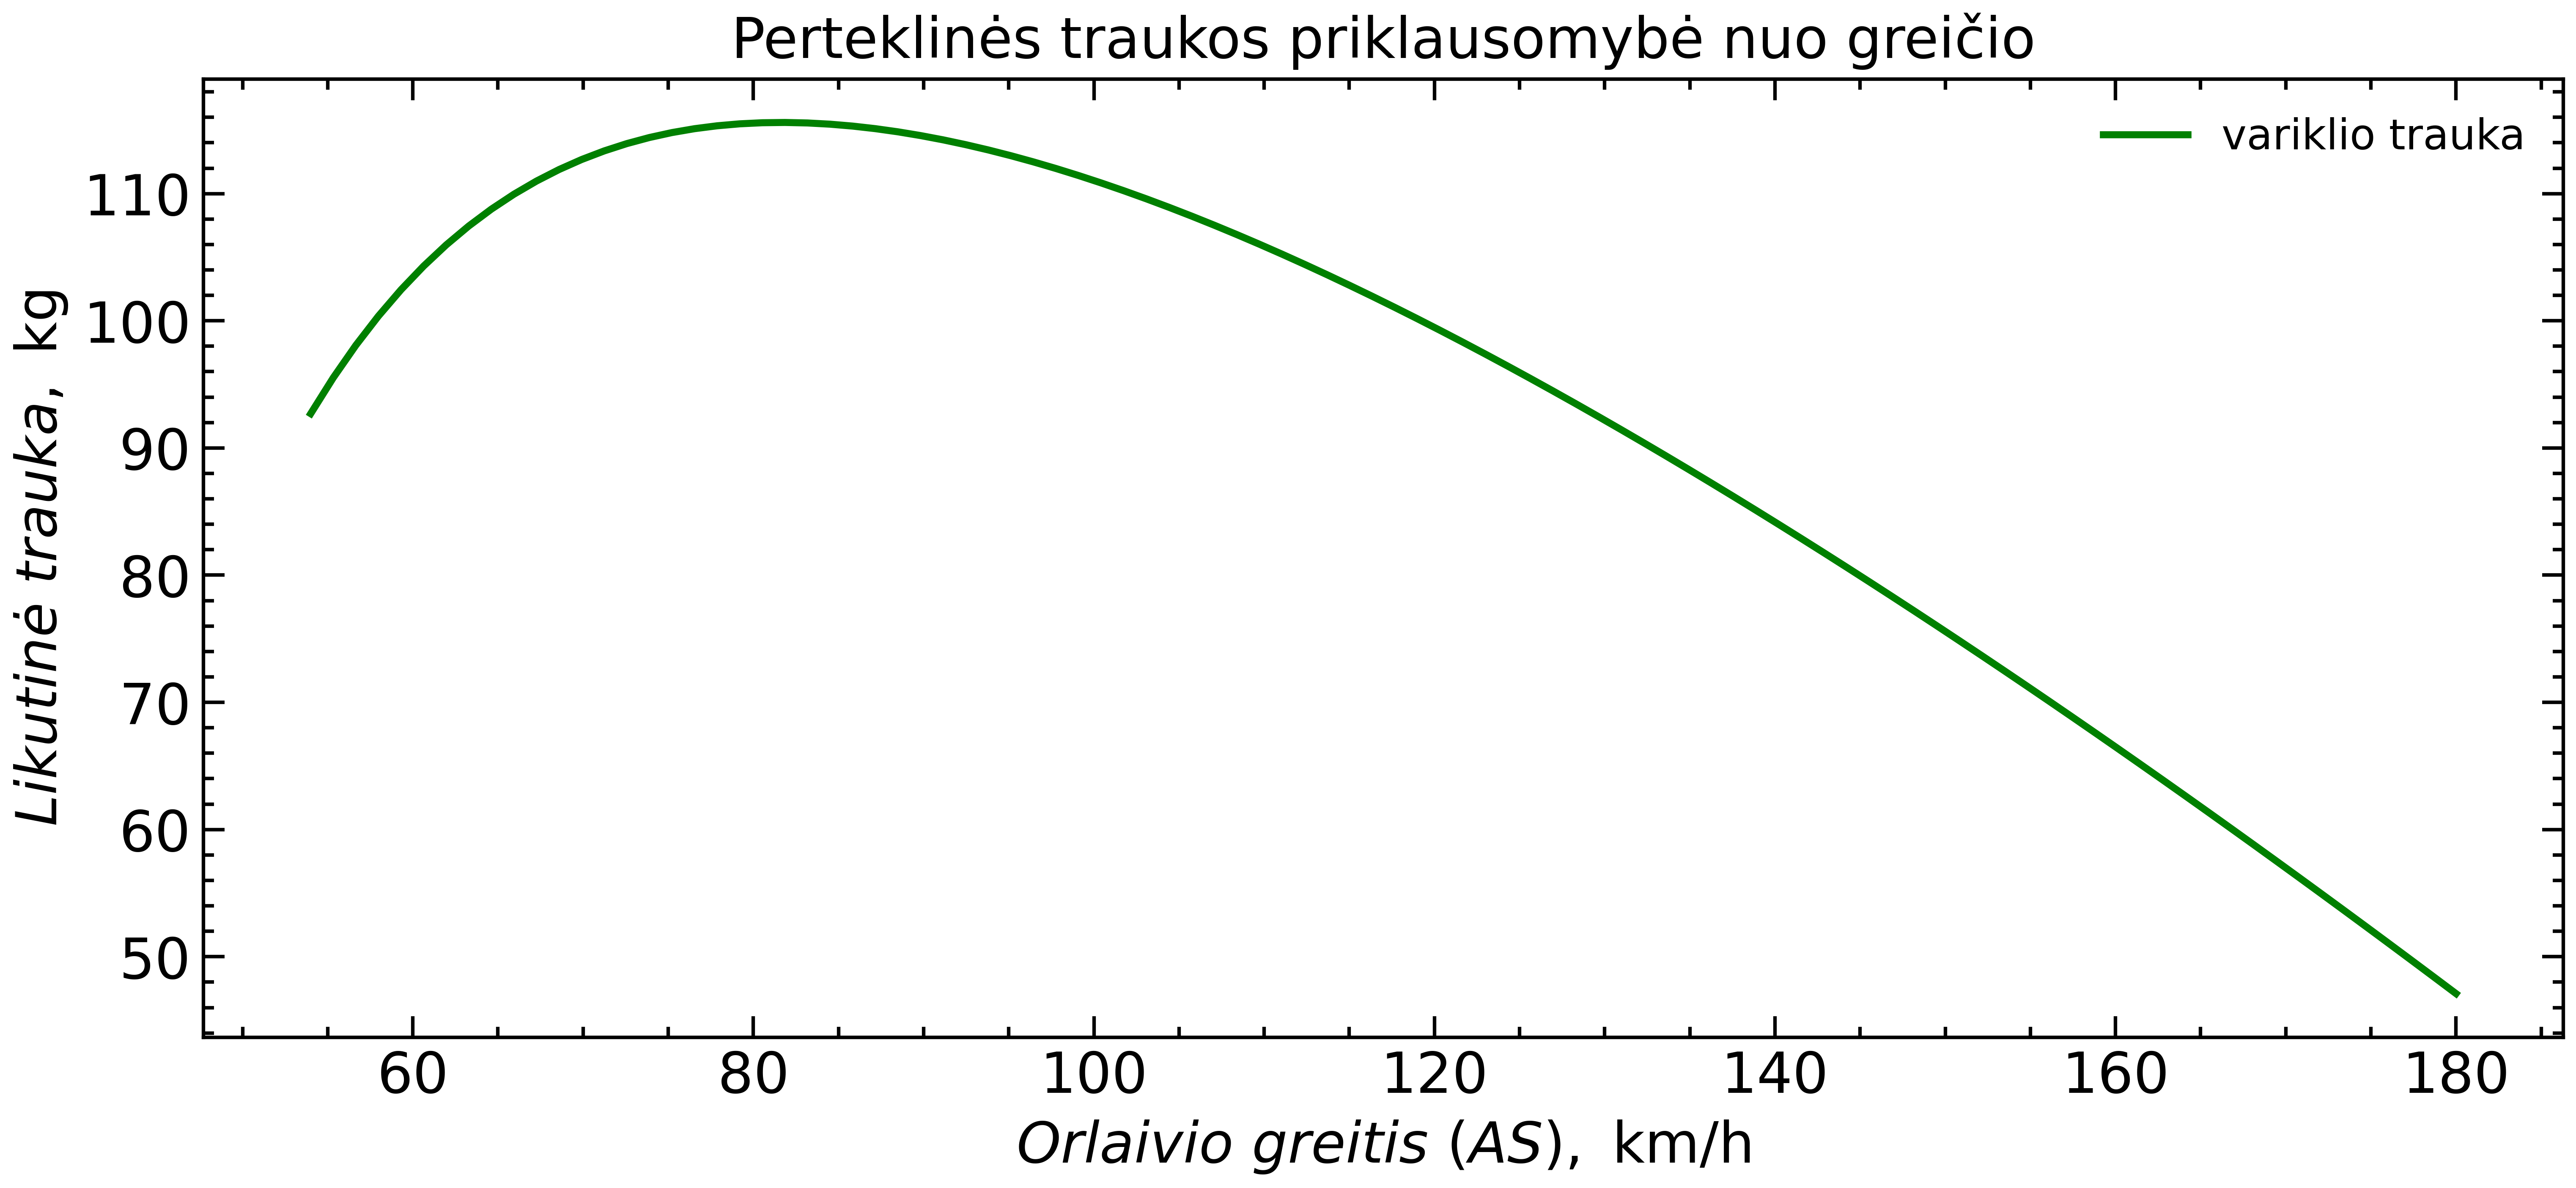

In [7]:
with plt.style.context(['science', 'ieee', 'notebook']):
    plt.figure(figsize=(12,5))
    plt.title('Perteklinės traukos priklausomybė nuo greičio', fontsize=16)
    plt.xlabel('$Orlaivio~greitis~(AS),$ km/h')
    plt.ylabel('$Likutinė~trauka,$ kg')
    plt.plot(V*(3600/1000),(T_A-(D_i+D_p)), color='g',linestyle='solid', label='variklio trauka')
    plt.legend(loc="upper right", fontsize="12")

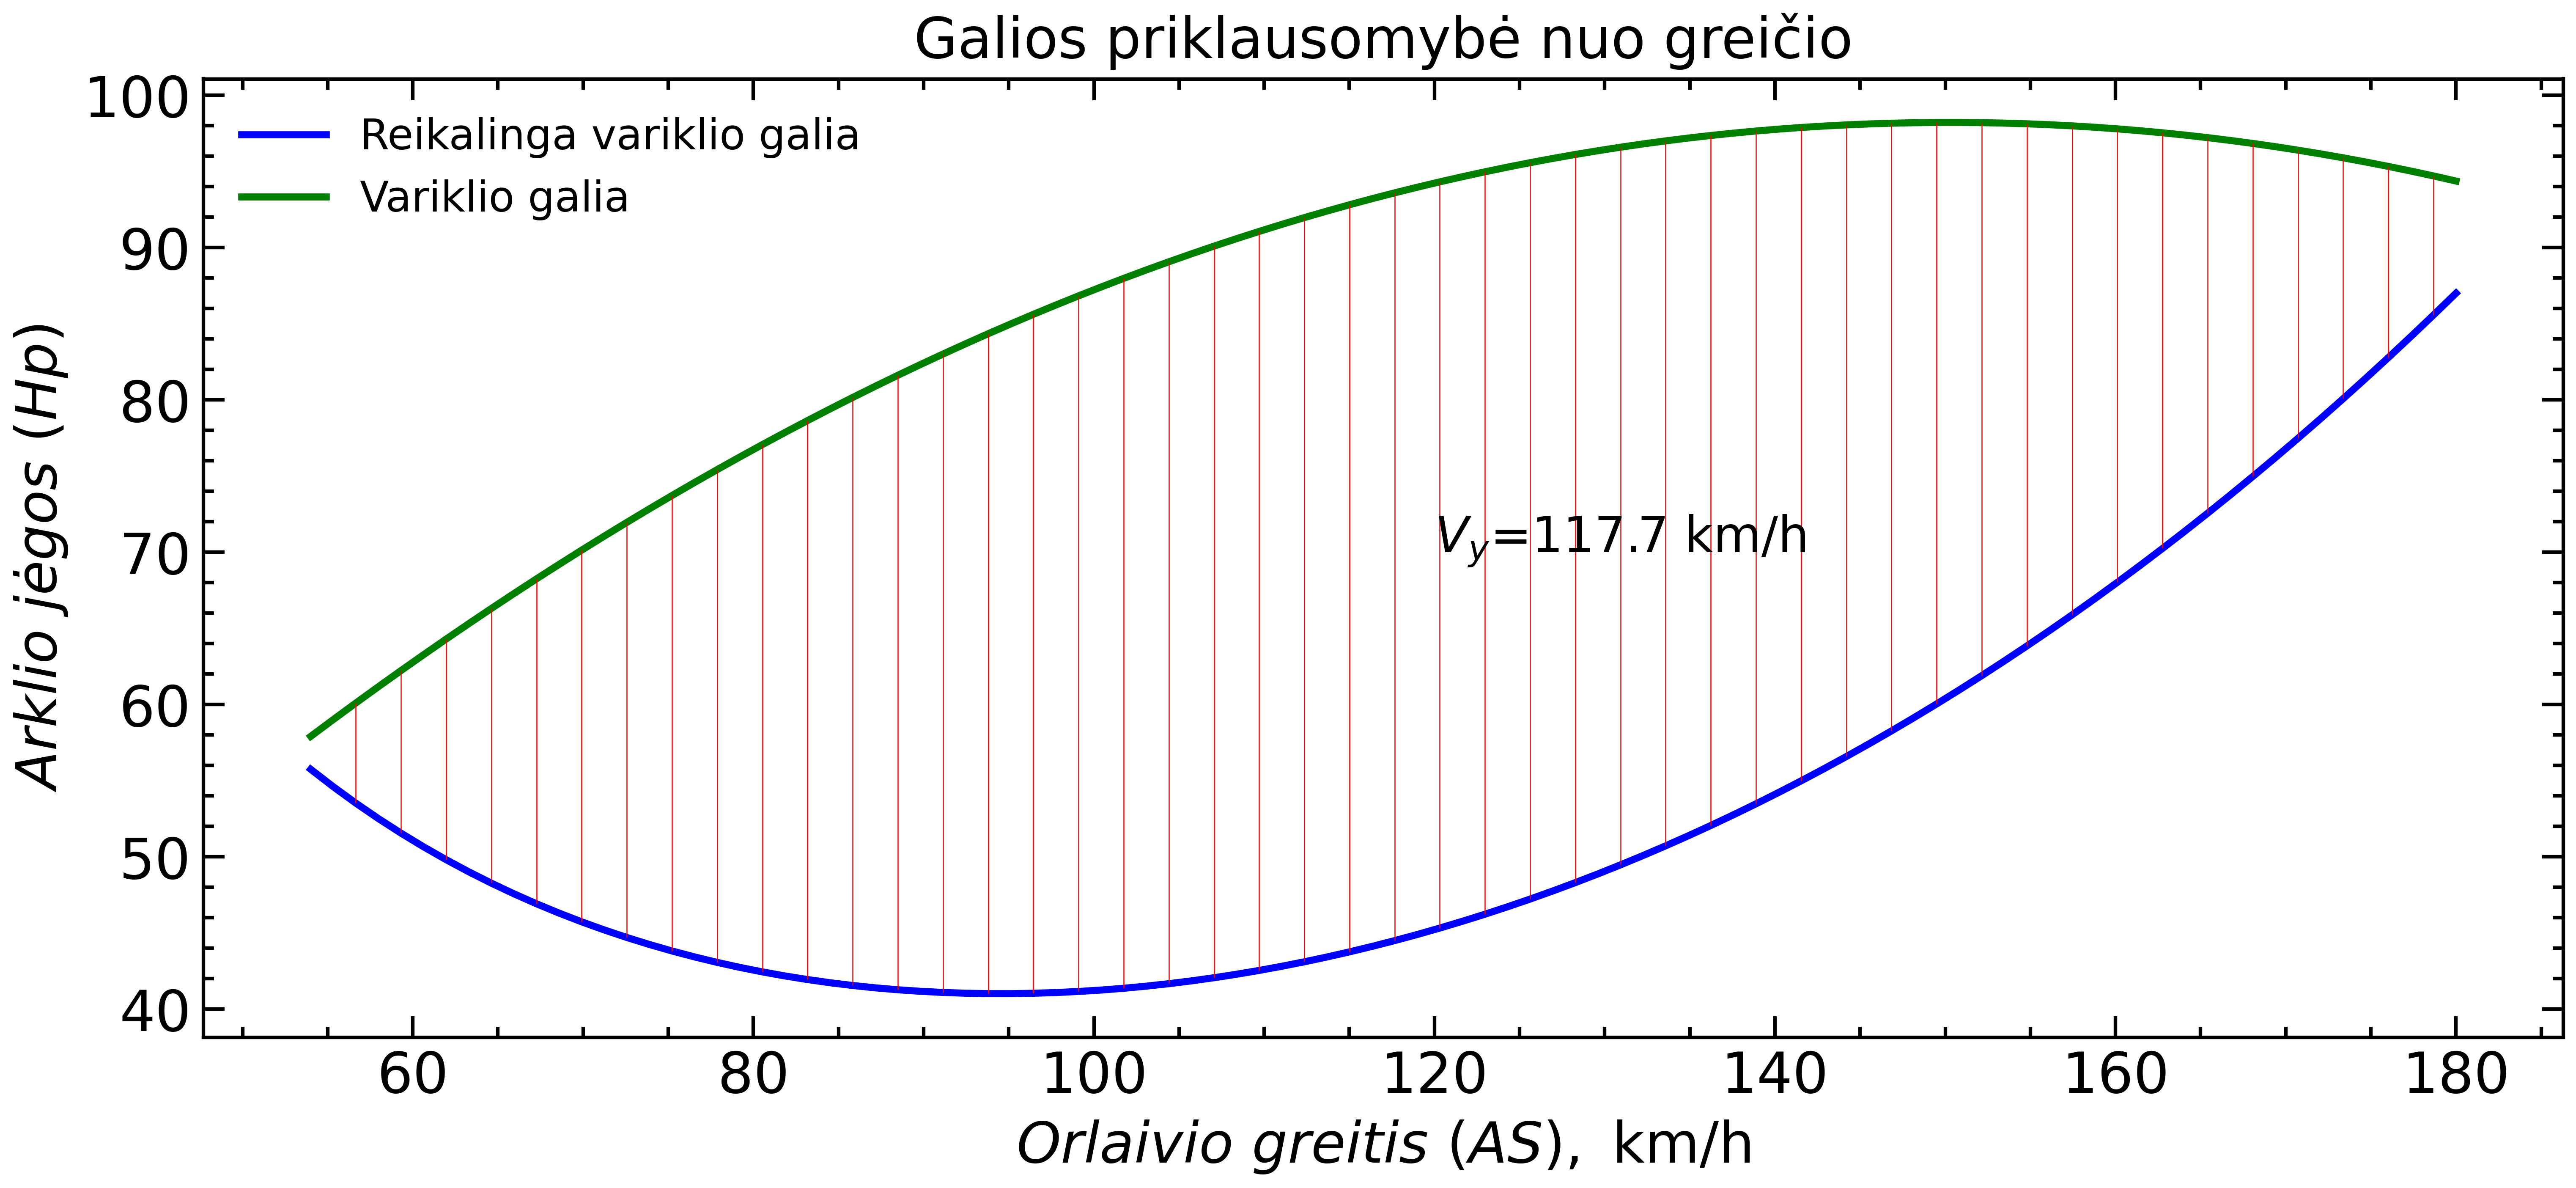

In [8]:
with plt.style.context(['science', 'ieee', 'notebook']):
    plt.figure(figsize=(12,5))
    plt.title('Galios priklausomybė nuo greičio', fontsize=16)
    plt.xlabel('$Orlaivio~greitis~(AS),$ km/h')
    plt.ylabel('$Arklio~jėgos~(Hp)$')
    plt.plot(V*(3600/1000),(D_i+D_p)*V*(3600/1000)*0.012, color='b', label='Reikalinga variklio galia')
    plt.plot(V*(3600/1000),(T_A)*V*(3600/1000)*0.006, linestyle='solid', color='green', label='Variklio galia')
    xcoords = V*(3600/1000)
    ycoords = (T_A)*V*(3600/1000)*0.006-((D_i+D_p)*V*(3600/1000)*0.012)
    i=0
    for p in range(0, 94):
        i+=2
        if i>(len(V)-2):
            break
        plt.vlines(x=V[i]*(3600/1000), ymin=((D_i[i]+D_p[i])*V[i]*(3600/1000)*0.012), ymax=(T_A[i])*V[i]*(3600/1000)*0.006, color='red', linewidth=0.3)
    plt.legend(loc="upper left", fontsize="12")
    
    plt.text(120, 70, '$V_y$='+str(round(V[np.argmax((T_A)*V*(3600/1000)*0.006-((D_i+D_p)*V*(3600/1000)*0.012))]*(3600/1000),1))+' km/h', fontsize=14)
plt.savefig('Hp_req+Hp_avail+deltas+Vy'+'.png', dpi=300, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )